# Hyperspec

In [1]:
import hyperspy.api as hs                 # hyperspectral data processing and some useful image viewing
import h5py                               # to handle .h5 files
from matplotlib import pyplot as plt      # Plotting
import numpy as np                        # Maths
import cv2                                # Image analysis
from os import walk                       # To get filepaths automatically
from natsort import natsorted             # To easily resort file order
from datetime import datetime             # For easily parsing timestamps
import warnings
warnings.filterwarnings("ignore")         # Attempt to remove some unnecessary pyplot warnings
import optical_image_functions as oif

In [2]:
folder=r'C:\Users\es758\University of Cambridge\Alice Dearle - mini1 hyper-perov\example 2 hyperspectral\090321\\'
fpaths = oif.get_filepaths(folder)
fpath=fpaths[100]
print(fpath)
f = h5py.File(fpath,'r')
# Extract the image
print(len(f['Cube/Images']))
print(len(f['Cube/Wavelength']))
pixel_size = oif.get_pixel_size(fpath)
pixel_size

C:\Users\es758\University of Cambridge\Alice Dearle - mini1 hyper-perov\example 2 hyperspectral\090321\\Untitled_50(1)(1).h5
26
26


0.325

In [3]:
def extract_h5py_image_stack(fpath):
    f = h5py.File(fpath,'r')
    
    pixel_size = oif.get_pixel_size(fpath)
    
    wavelengths=np.array(f['Cube/Wavelength'])
    dwavelength=wavelengths[1]-wavelengths[0]
    print(dwavelength)
    images = np.array(f['Cube/Images']).astype("float32")
    
    lam_size, y_size, x_size = images.shape
    
    dictlam = {'size': lam_size, 'name':'lambda', 'units':'nm', 'scale':dwavelength, 'offset':wavelengths[0]}
    dicty = {'size': y_size, 'name':'y', 'units':'µm', 'scale':pixel_size, 'offset':0} # Note y still increases as go down the image
    dictx = {'size': x_size, 'name':'x', 'units':'µm', 'scale':pixel_size, 'offset':0}

    image_stack = hs.signals.Signal2D(images, axes =[dictlam, dicty, dictx])
    return image_stack

In [13]:
%matplotlib qt

folder=r'C:\Users\es758\University of Cambridge\Alice Dearle - mini1 hyper-perov\example 2 hyperspectral\090321\\'
fpaths = oif.get_filepaths(folder)
fpath=fpaths[0]
print(fpath)

test_image_stack = extract_h5py_image_stack(fpath)
# test_image_stack.plot(navigator='auto')
# test_image_stack.axes_manager

im_1d = test_image_stack.transpose()
im_1d.plot(navigator='slider')
im_1d.axes_manager

C:\Users\es758\University of Cambridge\Alice Dearle - mini1 hyper-perov\example 2 hyperspectral\090321\\Untitled(1)(1).h5
2.0


<Axes manager, axes: (1024, 1024|26)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |   1024 |      0 |       0 |    0.33 |     µm 
               y |   1024 |      0 |       0 |    0.33 |     µm 
---------------- | ------ | ------ | ------- | ------- | ------ 
          lambda |     26 |        | 5.1e+02 |       2 |     nm

In [5]:
# inspecting how the data is stored before stacking.

(26, 1024, 1024)
(1024, 1024)
(1024, 1024)


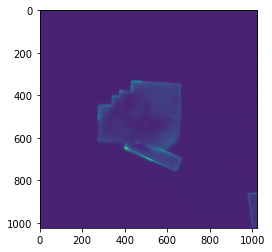

In [6]:
%matplotlib inline
print(test_image_stack.data.shape)
print(test_image_stack.data[7][:][:].shape)
test=test_image_stack.data[24][:][:]
print(test.shape)
plt.imshow(test)

(1024, 1024, 26)
(1024, 26)
(1024, 1024)


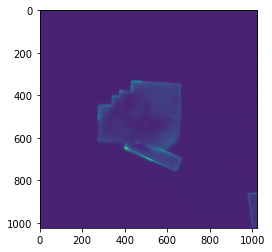

In [7]:
%matplotlib inline
print(im_1d.data.shape)
print(im_1d.data[0].shape)
test=im_1d.data[:][:]
print(test[:,:,0].shape)
plt.imshow(test[:,:,24])

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=SVD
  output_dimension=None
  centre=None


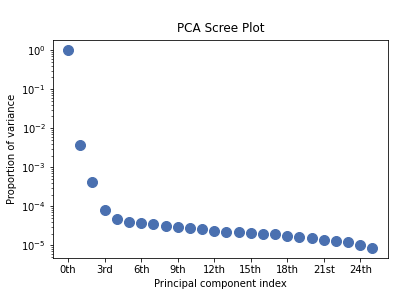

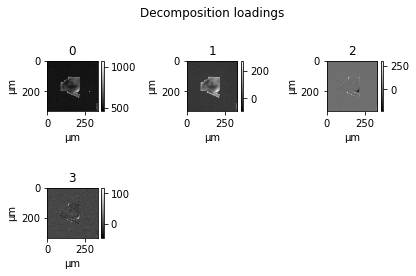

In [11]:
# svd = im_1d.decomposition()
# im_1d.plot_explained_variance_ratio()
# im_1d.plot_decomposition_loadings(comp_ids=4) # look at relevant sections of the image
# plt.show()

In [15]:
#im_1d.decomposition(algorithm="sklearn_pca")
im_1d.decomposition(algorithm="NMF", output_dimension=4)
#im_1d.plot_explained_variance_ratio()

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=NMF
  output_dimension=4
  centre=None
scikit-learn estimator:
NMF(n_components=4)


In [16]:
%matplotlib qt
# set the number of components to whatever looks sensible from the scree plot
im_1d.plot_decomposition_loadings(comp_ids=4) # look at relevant sections of the image
plt.show()
im_1d.plot_decomposition_factors(comp_ids=4) # look at corresponding spectra
plt.show()